# Machine Learning Assessment

## Input

Import calls.

In [1]:
import pandas as pd

# Convert to pandas DataFrame
calls_df = pd.read_csv('./data/calls.csv')
print(calls_df.info())
print(calls_df.head(1))

calls_df['Datetime'] = pd.to_datetime(calls_df['Datetime'],\
                                      format="%m/%d/%Y %I:%M:%S %p").dt.tz_localize(tz='US/Pacific', ambiguous='NaT')
calls_df.dropna(inplace=True)
calls_df.set_index('Datetime', inplace=True)
calls_df.sort_index(inplace=True)

# results_df['type'] = results_df['type'].astype('category')

print(calls_df.info())
print(calls_df.head(2))
print(calls_df.tail(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561274 entries, 0 to 1561273
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Address          1561213 non-null  object 
 1   Type             1561274 non-null  object 
 2   Datetime         1561274 non-null  object 
 3   Latitude         1560636 non-null  float64
 4   Longitude        1560636 non-null  float64
 5   Report Location  1560666 non-null  object 
 6   Incident Number  1561274 non-null  object 
dtypes: float64(2), object(5)
memory usage: 83.4+ MB
None
      Address      Type                Datetime  Latitude   Longitude  \
0  904 7th Av  Car Fire  05/22/2019 12:55:00 PM   47.6069 -122.329051   

               Report Location Incident Number  
0  POINT (-122.329051 47.6069)      F190051945  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1560241 entries, 2003-11-07 09:30:48-08:00 to 2021-05-17 10:25:00-07:00
Data columns (total 6 column

In [2]:
wtr_df = pd.read_csv('data/Seattle Weatherdata 2002 to 2020.csv')
wtr_df['datetime'] = pd.to_datetime(wtr_df['dt'], unit='s').\
dt.tz_localize(tz='UTC').\
dt.tz_convert('US/Pacific')
wtr_df.set_index('datetime', inplace=True)

# weather_df['temp'].groupby(weather_df['datetime'].dt.hour).mean().plot()
# plt.show()

# weather_df['pressure'].groupby(weather_df['datetime'].dt.hour).mean().plot()
# plt.show()

print(wtr_df.info())
# print(weather_df.head())
# print(weather_df.tail())
# wtr_df[wtr_df.index.duplicated()]
# wtr_df.loc["2002-01-08 11:00:00-08:00"]


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170996 entries, 2001-12-31 16:00:00-08:00 to 2020-11-04 15:00:00-08:00
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   170996 non-null  int64  
 1   dt_iso               170996 non-null  object 
 2   timezone             170996 non-null  int64  
 3   city_name            170996 non-null  object 
 4   lat                  170996 non-null  float64
 5   lon                  170996 non-null  float64
 6   temp                 170996 non-null  float64
 7   feels_like           170996 non-null  float64
 8   temp_min             170996 non-null  float64
 9   temp_max             170996 non-null  float64
 10  pressure             170996 non-null  int64  
 11  sea_level            0 non-null       float64
 12  grnd_level           0 non-null       float64
 13  humidity             170996 non-null  int64  
 14  wind_speed           1

Features

In [22]:
x_raw = wtr_df[['temp', 'pressure', 'humidity']]
# x_raw.drop_duplicates(inplace=True)

y_raw = calls_df['Incident Number'].resample('H').count().to_frame('incident_count')
xy = y_raw.join(x_raw.index.isocalendar())
xy['hour'] = xy.index.hour
xy = xy.join(x_raw).dropna()

xy.drop_duplicates(inplace=True)

print(xy.info())

xy

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148975 entries, 2003-11-07 09:00:00-08:00 to 2020-11-04 15:00:00-08:00
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   incident_count  148975 non-null  int64  
 1   year            148975 non-null  UInt32 
 2   week            148975 non-null  UInt32 
 3   day             148975 non-null  UInt32 
 4   hour            148975 non-null  int64  
 5   temp            148975 non-null  float64
 6   pressure        148975 non-null  float64
 7   humidity        148975 non-null  float64
dtypes: UInt32(3), float64(3), int64(2)
memory usage: 9.0 MB
None


,incident_count,year,week,day,hour,temp,pressure,humidity
2003-11-07 09:00:00-08:00,5,2003,45,5,9,5.62,1018.0,65.0
2003-11-07 10:00:00-08:00,20,2003,45,5,10,5.67,1018.0,66.0
2003-11-07 11:00:00-08:00,5,2003,45,5,11,6.42,1017.0,65.0
2003-11-07 12:00:00-08:00,17,2003,45,5,12,7.42,1017.0,61.0
2003-11-07 13:00:00-08:00,13,2003,45,5,13,8.87,1016.0,57.0
...,...,...,...,...,...,...,...,...
2020-11-04 11:00:00-08:00,17,2020,45,3,11,16.36,1016.0,77.0
2020-11-04 12:00:00-08:00,16,2020,45,3,12,17.41,1016.0,77.0
2020-11-04 13:00:00-08:00,17,2020,45,3,13,17.28,1016.0,72.0
2020-11-04 14:00:00-08:00,13,2020,45,3,14,17.29,1016.0,72.0


In [29]:
xy['2016':'2020'].iloc[:, 1:]

,year,week,day,hour,temp,pressure,humidity
2016-01-01 00:00:00-08:00,2015,53,5,0,-2.63,1033.0,74.0
2016-01-01 01:00:00-08:00,2015,53,5,1,-3.31,1032.0,80.0
2016-01-01 02:00:00-08:00,2015,53,5,2,-3.41,1032.0,80.0
2016-01-01 03:00:00-08:00,2015,53,5,3,-4.07,1032.0,84.0
2016-01-01 04:00:00-08:00,2015,53,5,4,-3.30,1032.0,88.0
...,...,...,...,...,...,...,...
2020-11-04 11:00:00-08:00,2020,45,3,11,16.36,1016.0,77.0
2020-11-04 12:00:00-08:00,2020,45,3,12,17.41,1016.0,77.0
2020-11-04 13:00:00-08:00,2020,45,3,13,17.28,1016.0,72.0
2020-11-04 14:00:00-08:00,2020,45,3,14,17.29,1016.0,72.0


In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_tr = xy.loc['2016':'2020'].iloc[:, 1:]
x_te = xy.loc['2015'].iloc[:, 1:]
y_tr = xy.loc['2016':'2020'].iloc[:, 0]
y_te = xy.loc['2015'].iloc[:, 0]

reg_all = LinearRegression()
reg_all.fit(x_tr, y_tr)
y_pd = reg_all.predict(x_te)
print(reg_all.score(x_te, y_te))
print(np.sqrt(mean_squared_error(y_te, y_pd)))

0.1994464549535463
4.603590211724555


                           prediction  incident_count
2015-01-01 00:00:00-08:00    8.235248              37
2015-01-01 01:00:00-08:00    8.515270              28
2015-01-01 02:00:00-08:00    8.738371              30
2015-01-01 03:00:00-08:00    8.655652              17
2015-01-01 04:00:00-08:00    8.962906              11
...                               ...             ...
2015-12-31 19:00:00-08:00   13.873018              15
2015-12-31 20:00:00-08:00   14.132451              13
2015-12-31 21:00:00-08:00   13.900934              20
2015-12-31 22:00:00-08:00   14.167635              12
2015-12-31 23:00:00-08:00   13.839267              20

[8760 rows x 2 columns]


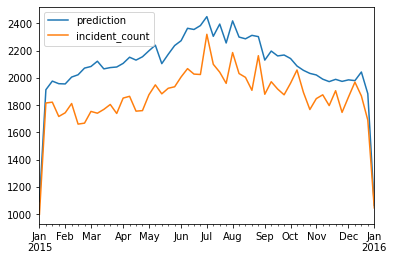

In [60]:
import matplotlib.pyplot as plt

ress = pd.DataFrame(data=y_pd, index=y_te.index, columns=['prediction']).join(y_te)
print(ress)
ress.resample('W').sum().plot()
plt.show()